# DS-SF-30 | Unit Project 2: Exploratory Data Analysis

In this project, you will implement the exploratory analysis plan developed in Unit Project 1.  This will lay the groundwork for our our first modeling exercise in Unit Project 3.

First, load the python libraries you will need for this project:

In [39]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 10)
pd.set_option('display.notebook_repr_html', True)

%matplotlib inline
plt.style.use('ggplot')

Then, read in your dataset:

In [40]:
df = pd.read_csv(os.path.join('..', '..', 'dataset', 'dataset-ucla-admissions.csv'))

df.head()

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0


## Questions

> ### Question 1.  How many observations are in our dataset?

In [41]:
df.shape[0]

400

Answer:400

> ### Question 2.  Create a summary table.

In [42]:
df.describe()

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,520.000000,3.13000,2.000000
50%,0.000000,580.000000,3.39500,2.000000
75%,1.000000,660.000000,3.67000,3.000000
max,1.000000,800.000000,4.00000,4.000000


> ### Question 3.  Why would `gre` have a larger variance than `gpa`?

In [43]:
df.isnull().sum()

admit       0
gre         2
gpa         2
prestige    1
dtype: int64

Answer: Since gre is has a higher scale (2 orders of magnitude) than gpa missing values might cause high variance.

> ### Question 4.  Drop data points with missing data.

In [44]:

df.dropna(subset = ['gre', 'gpa', 'prestige'], inplace = True, axis = 0)

> ### Question 5.  Confirm that you dropped the correct data.  How can you tell?

In [46]:
print(df.isnull().sum())
df.shape[0]

admit       0
gre         0
gpa         0
prestige    0
dtype: int64


397

Answer: The number of is null data is down to zero in all columns and we have 397 rows which is expected.

> ### Question 6.  Create boxplots for `gre` and `gpa`.

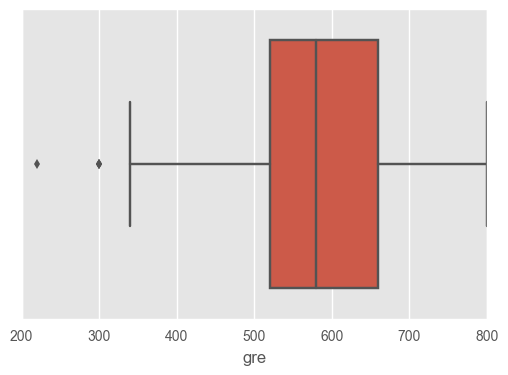

In [51]:
sns.boxplot(x = 'gre', data = df)

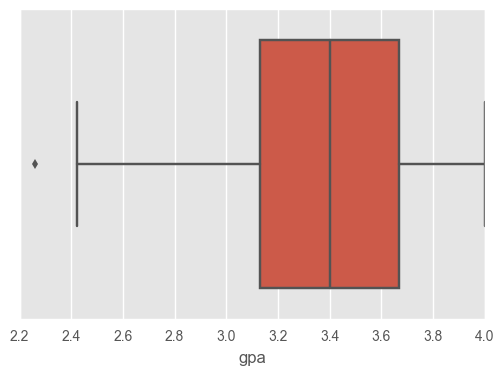

In [52]:
sns.boxplot(x = 'gpa', data = df)

> ### Question 7.  What do boxplots show?

Answer: gre data has a couple outliers and gpa data has one outlier

> ### Question 8.  Plot the distribution of each variable.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11bf27150>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11c246c10>]], dtype=object)

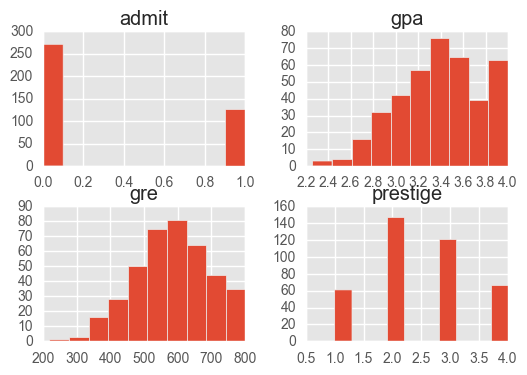

In [63]:
df.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11bedcd90>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x120eb5690>]], dtype=object)

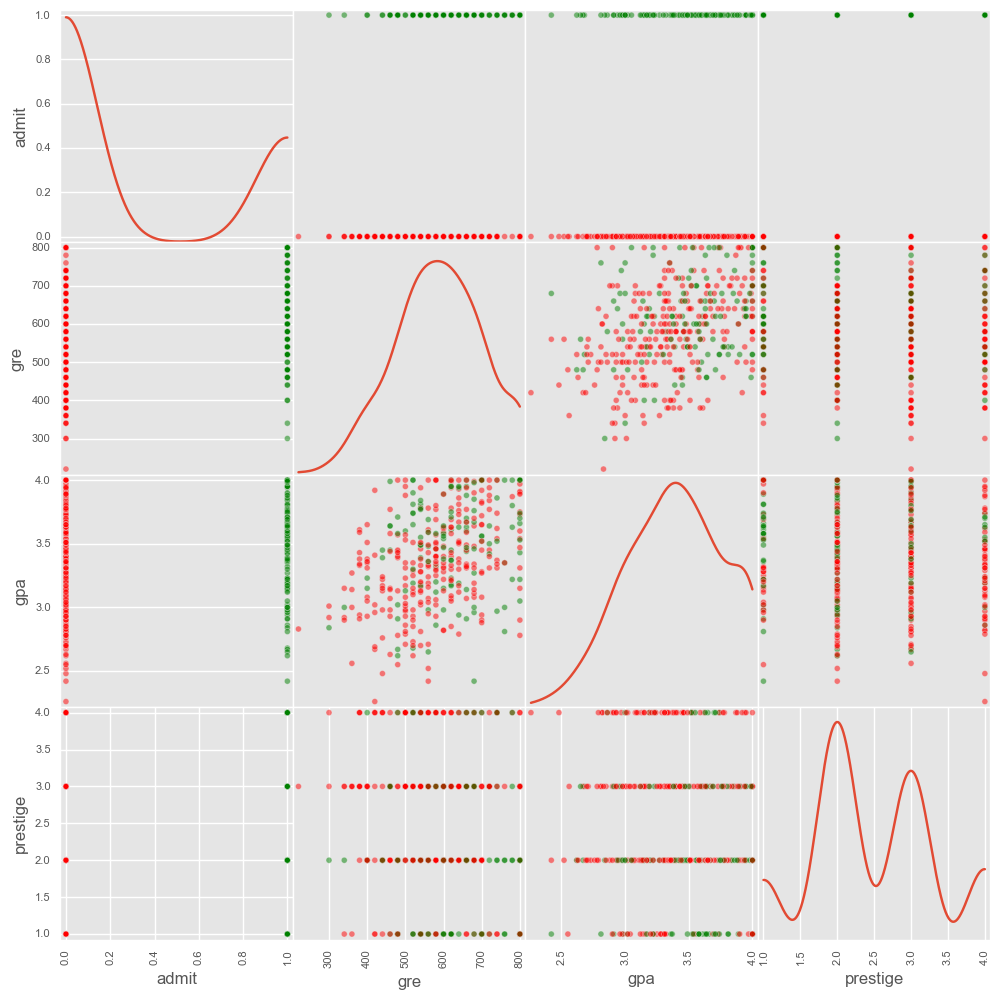

In [76]:
color = df.admit.map({1: 'green', 0: 'red'})
pd.tools.plotting.scatter_matrix(
    df, diagonal = 'kde', s = 75, c = color, figsize = (12, 12)
)

> ### Question 9.  If our model had an assumption of a normal distribution for `gre` and `gpa`, would we meet that requirement?  Would their distributions need correction?  If so, why, why not?  How?

In [74]:
import scipy.stats
scipy.stats.normaltest(df.gre)

NormaltestResult(statistic=3.8179829306094266, pvalue=0.14822980613776662)

In [75]:
scipy.stats.normaltest(df.gpa)

NormaltestResult(statistic=13.079875560916445, pvalue=0.001444578377229117)

Answer: Both gre and gpa don't look like they have distributions closer to a normal distribution. We could remove the outliers and resample the data to get closer to a normal distribution.

> ### Question 10.  Create a correlation matrix for the dataset

In [61]:
df.corr()

,admit,gre,gpa,prestige
admit,1.000000,0.181202,0.174116,-0.243563
gre,0.181202,1.000000,0.382408,-0.124533
gpa,0.174116,0.382408,1.000000,-0.060976
prestige,-0.243563,-0.124533,-0.060976,1.000000


> ### Question 11.  What did you find?  Which of our variables are potentially colinear?

Answer: Both gre and gpa seem to have a similar correlation with admittance but overall prestige seems to have a higher correlation with admittance.

> ### Question 12.  Write an analysis plan for exploring the association between graduate school admission rates and prestige of undergraduate schools.

Answer:

> ### Question 13.  What is your hypothesis?

Answer: Students from undergraduate schools that have a higher prestige (1 is higher, 4 is lower) combined with higher gpa scores tend to have the highest probability of admittance.